# __Supervised Learning: Regression__

## __Agenda__ ##

* Types of Regression
    * Linear Regression
      * Simple Linear Regression
        - Train-Test Split
      * Multiple Linear Regression
        - Overfitting and Underfitting
    * Non-Linear Regression
      * Polynomial Regression
* Model Evaluation and Validation
    * Cross-Validation Techniques
    * Performance Metrics for Regression
      * Mean Squared Error (MSE)
      * Root Mean Squared Error (RMSE)
      * Mean Absolute Error (MAE)
      * R-Squared
* Regularization Techniques
    * Lasso Regression
    * Ridge Regression
    * ElasticNet Regression
* Hyperparameter Tuning
    * GridSearchCV
    * RandomSearchCV
    



## __3.2 Regression__ ##

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Linear.png)

### __3.2.1 Application of Regression__

1. Oil and Gas Industry: Various types of data are collected in the oil and gas industry from the surface and subsurface to understand production and sale processes. Linear and non-linear regression models forecast global oil production.

2. Marketing: In marketing, linear regression helps analyze the effectiveness of advertising campaigns, predict sales based on marketing spend, and segment customers based on demographic data.

3. Retail: Linear regression is utilized in retail for demand forecasting, inventory management, pricing optimization, and customer analytics.

4. Healthcare: Linear regression is applied in healthcare for predicting patient outcomes, analyzing the relationship between medical variables and disease progression, and planning healthcare resources.

5. Real Estate: In the real estate industry, linear regression predicts property prices based on factors such as location, size, amenities, and economic indicators.


## __3.3 Types of Regression__

Regression types can be classified into two categories: linear and non-linear.

**Linear Regression**

Definition: Linear regression finds a straight-line relationship between the dependent variable and one or more independent variables.

**Non-Linear Regression**

Definition: Non-linear regression finds a relationship between the dependent variable and independent variables using a curve or a more complex shape.


## __3.4 Linear Regression__

**Linear Regression** refers to a supervised learning algorithm used to predict a continuous target variable by modeling its relationship with one or more independent variables through a linear equation.

- It predicts a continuous dependent variable based on one or more independent variables.
- It uses the least squares criterion to estimate the coefficients of the regression equation..
- It can be applied only if there is a linear relationship between the variables.



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Linear.png)

In this case, the dependent variable is continuous, and the independent variables can be either continuous or discrete.
The relationship between a dependent variable (y) and one or more independent variables (x) is established using a best-fit straight line, also known as the regression line.



There are two types of linear regression:
- Simple linear regression
- Multiple linear regression

### __3.4.1 Simple Linear Regression__ ###

**Simple Linear Regression**

Definition: Simple linear regression models the relationship between one independent variable and the dependent variable as a straight line.

The equation for Simple Linear Regression is:

 $$ y = \beta_0 + \beta_1x $$

where:

- $y$ is the dependent variable
- $x$ is the independent variable
- $β_0$ is the intercept
- $β_1$ is the slope



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg)

### __3.4.2 Multiple Linear Regression__ ###

**Multiple Linear Regression**

Definition: Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.

The equation for Multiple Linear Regression:

 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$

- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.





![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/multiple_linear_regression.jpg)

### Let us see how to fit the linear regression model on a dataset.

#### Step 1: Import the Required Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Read the dataset `tvmarketing.csv`.


In [2]:
data=pd.read_csv("../data/tvmarketing.csv")
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


The following command provides details about the dataset that was imported:

In [3]:
# Display a summary of the DataFrame, including the column names, non-null count, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
data.shape

(200, 2)

__Observation:__
- There are no null objects.

**Train and test the model**

#### Step 2: Fit the Linear Regression Model

- Now, let's define the features and the target variables.
- Here, X is assigned to all the rows in the first column of the dataset.

- y is assigned to all the rows of the second column of the same dataset.

In [5]:
# Extract the feature(s) from the DataFrame
X=data.iloc[:,0:1].values #Or, equivalently X=data[['TV']]
# Extract the target variable from the DataFrame
y=data.iloc[:,1].values

In [6]:
X[:10]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8]])

In [7]:
y[:10]

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6])

**Perform train-test split**

Train-test split is a technique in machine learning used to evaluate a model's performance by dividing the data into two parts: a training set and a test set. The model is trained on the training set, learning patterns and parameters, and then evaluated on the test set to see how well it generalizes to new, unseen data.

**Note:** This train-test data split will be used for other implementations as well.

In [8]:
# Import train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

Allowed inputs in `train_test_split()` are lists, numpy arrays, scipy-sparse matrices or pandas dataframes. In this implementation X and y will be passed as arrays of corresponding values


In [9]:
# Split the data into training and testing sets using 30% of the samples as test samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30) # random_state is optional and can be be whatever value

In [10]:
X_train[:10]

array([[  8.7],
       [  8.6],
       [156.6],
       [107.4],
       [293.6],
       [197.6],
       [ 76.4],
       [120.5],
       [193.7],
       [ 43.1]])

In [11]:
len(X_train)

140

In [12]:
X_test[:10]

array([[104.6],
       [239.8],
       [142.9],
       [280.7],
       [229.5],
       [ 62.3],
       [  7.8],
       [220.5],
       [ 59.6],
       [164.5]])

In [13]:
len(X_test)

60

__The train set has 140 samples and the test set has 60.__

In [14]:
y_train[:10]

array([ 7.2,  4.8, 10.5, 11.5, 20.7, 11.7,  9.4, 14.2, 19.2, 10.1])

In [15]:
y_test[:10]

array([10.4, 12.3, 15. , 16.1, 19.7,  9.7,  6.6, 20.1,  9.7, 14.5])

In [16]:
len(y_train)

140

In [17]:
len(y_test)

60

This code splits the dataset (X, y) into a training set (70%) and a test set (30%).

As you may have noticed, we’ve been setting the random_state parameter in our examples. This parameter is the seed used by the random number generator. Setting a seed ensures that the splits you generate are reproducible. If you don’t set a seed, you might get different splits every time you run the code, which can make your results hard to replicate.
it

- First, let us see if linear regression works on this data.
- From **sklearn.linear_model**, import the linear regression function.
- Assign **LinearRegression()** to the variable **lin_reg**.
- Next, fit the data on the training data `X_train` and `y_train`.

In [18]:
# Import the LinearRegression class from scikit-learn's linear_model library
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Fit = Train the model using the TRAINING SET
lin_reg.fit(X_train,y_train)

LinearRegression()

**Observation**:



- Fit the linear regression model to the given dataset.
- Visualize the fitted data using a scatter plot.
- Define a function named **viz_linear** to display the X_test and y_test values as green points on a graph, and illustrate the fitted regression line in blue.
- Provide the appropriate X and y axis labels along with a suitable title for the plot.

In [19]:
# Visualize the linear regression model
def viz_linear():
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')  # Using training set line for comparison
    plt.title('Linear Regression Model (Test set)')
    plt.xlabel('Sales')
    plt.ylabel('TV')
    plt.show()


- Call the following function to create the plot:

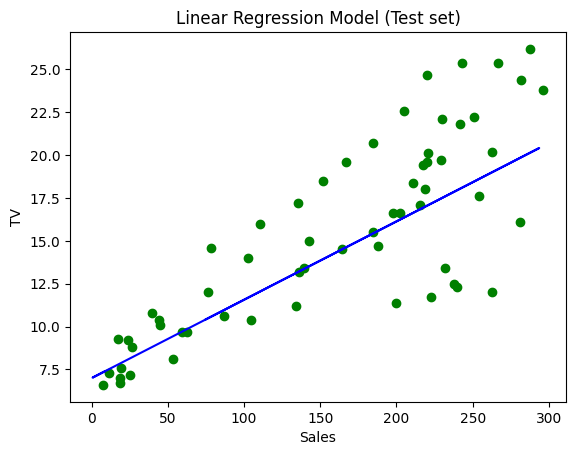

In [20]:
viz_linear()

__Observation:__
- The plot shows a positive linear relationship between Sales and TV, where the blue regression line indicates the model's predictions. The green data points are generally close to the line, suggesting the model fits the data reasonably well, though some variability exists.

**Let's look at how to check for overfitting or underfitting of the model**

In [21]:
# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Evaluate the model on the training set = compute the predicted values for the train set
y_train_pred = lin_reg.predict(X_train)

# Evaluate the model on the test set = = compute the predicted values for the train set
y_test_pred = lin_reg.predict(X_test)

# Compute mean squared error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

# Compute mean absolute error
mae_train = mean_absolute_error(y_train,y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)

# Compute R Squared
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)
print("Training Set Mean Squared Error:", mae_train)
print("Test Set Mean Squared Error:", mae_test)
print("Training Set R² Score:", r2_train)
print("Test Set R² Score:", r2_test)
print("------------------------------------------")

Training Set Mean Squared Error: 10.2784255381001
Test Set Mean Squared Error: 11.45054643070969
Training Set Mean Squared Error: 2.547722076088936
Test Set Mean Squared Error: 2.6001810576272115
Training Set R² Score: 0.588936667870066
Test Set R² Score: 0.6186011328120248
------------------------------------------


**Observation**

 Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.

 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model

Overfitting: The model performs well on the training data but poorly on the test data (higher R² on training or lower MSE on training compared to testing).

Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.

We'll discuss more about MSE, R² and various other performance metrices, further in the lesson

__Remark: see the coefficients of the trained model.__ 

In [22]:
# weight (=slope)
lin_reg.coef_

array([0.0457208])

In [23]:
# bias (=intercept)
lin_reg.intercept_

np.float64(6.994269523051954)

## __Multi-linear Regression__

In [24]:
# Load the dataset
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [25]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [26]:
df.shape

(20640, 9)

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Build a multi-linear model with four features:
- housing_median_age
- total_rooms
- median_income
- total_bedrooms

## Target: median house value

In [29]:
# X = features of the samples = sample inputs; y = targets of the samples = sample ouputs
X = df[['housing_median_age','total_rooms','median_income','total_bedrooms']]
y = df['median_house_value']

In [30]:
# Train-test split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
# Declare a linear model
multi_reg = LinearRegression()

In [32]:
# Fit
multi_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
# Predict
y_train_pred = multi_reg.predict(X_train)
y_test_pred = multi_reg.predict(X_test)

In [34]:
y_test[:5]

15550    127700
18186    252400
16076    314300
5586     268300
7460     139800
Name: median_house_value, dtype: int64

In [35]:
y_test_pred[:5].reshape(5,1)

array([[143728.48216838],
       [233234.33241843],
       [258180.04386132],
       [267085.02201047],
       [128829.68030782]])

In [36]:
# Compute mean squared error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

# Compute mean absolute error
mae_train = mean_absolute_error(y_train,y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)

# Compute R Squared
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)
print(' ')
print("Training Set Mean Squared Error:", mae_train)
print("Test Set Mean Squared Error:", mae_test)
print(' ')
print("Training Set R² Score:", r2_train)
print("Test Set R² Score:", r2_test)
print("------------------------------------------")

Training Set Mean Squared Error: 5854289658.761159
Test Set Mean Squared Error: 6739804192.409779
 
Training Set Mean Squared Error: 56481.693171956
Test Set Mean Squared Error: 59598.02230412932
 
Training Set R² Score: 0.5541981208748505
Test Set R² Score: 0.5209135678057314
------------------------------------------


__See the coefficients.__

In [37]:
# This shows the weights beta_q, beta_2, beta_3 and beta_4
multi_reg.coef_

array([ 1.91879540e+03, -2.69102295e+01,  5.00553321e+04,  1.62461961e+02])

In [38]:
# This shows the bias beta_0
multi_reg.intercept_

np.float64(-58809.74668072144)

### Overfitting and Underfitting

When developing machine learning models, achieving the right balance between complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

**Overfitting**

- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).

**Underfitting**
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).
  
**Bias-Variance Tradeoff**
- Bias: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.
- Variance: Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.

**Tradeoff**
- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).
- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).
- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.
  
Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

## __3.6 Non-linear Regression__

### __3.6.1 Polynomial Regression__

**Polynomial Regression** is a subset of linear regression that includes polynomial terms.
The relationship between an independent variable (x) and a dependent variable (y) is modeled as an nth-degree polynomial.



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Polynomial.png)

- Polynomial regression is also called as the special case of multiple linear regression. Some polynomial terms are added to the multiple linear regression equation to convert into polynomial regression.
- It is a linear model with some modifications made to increase its accuracy.
- The dataset used in polynomial regression for training is non-linear.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/linear__regression.png)

- From the above figure, it is seen that the straight line is unable to capture the patterns in the given data.
- To achieve a higher-order equation that captures complex data patterns, the powers of the original features can be added as new features.


The following graph is the result after applying polynomial regression:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/polynomial__regression.png)

- It provides the best approximation of the relationship between a dependent and an independent variable.
- It captures most data points and decreases the error between the actual and the predicted values.

### Let us see how to fit polynomial regression on a dataset.


- First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of degree 4 to the variable **poly_features**.
- Fit the values of X_test and X_train  and assign them to the variable **X_test_poly** and **X_train_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_features**.
- Dataset used for this exercise is `tvmarketing.csv`

In [39]:
data=pd.read_csv("../data/tvmarketing.csv")
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [40]:
# Extract the feature(s) from the DataFrame
X=data.iloc[:,0:1].values
# Extract the target variable from the DataFrame
y=data.iloc[:,1].values

In [41]:
X[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

In [42]:
y[:5]

array([22.1, 10.4,  9.3, 18.5, 12.9])

In [43]:
# Import the PolynomialFeatures class from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

- Perform train-test split.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
X_train[:5],X_test[:5],y_train[:5],y_test[:5]

(array([[ 36.9],
        [ 31.5],
        [142.9],
        [209.6],
        [215.4]]),
 array([[ 69.2],
        [ 50. ],
        [ 90.4],
        [289.7],
        [170.2]]),
 array([10.8,  9.5, 15. , 15.9, 17.1]),
 array([11.3,  8.4,  8.7, 25.4, 11.7]))

Fit the X_train_poly and y_train in the model.

In [46]:
# Declare polynomial features, 4th order
poly_features = PolynomialFeatures(degree=4)

In [47]:
# Fit: here, fitting means "creating the new features: X^2, X^3, X^4"
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test) # in this specific case, you could use fit_transform even for the test set

In [48]:
X_train[:5]

array([[ 36.9],
       [ 31.5],
       [142.9],
       [209.6],
       [215.4]])

In [49]:
X_train_poly[:5]

array([[1.00000000e+00, 3.69000000e+01, 1.36161000e+03, 5.02434090e+04,
        1.85398179e+06],
       [1.00000000e+00, 3.15000000e+01, 9.92250000e+02, 3.12558750e+04,
        9.84560062e+05],
       [1.00000000e+00, 1.42900000e+02, 2.04204100e+04, 2.91807659e+06,
        4.16993145e+08],
       [1.00000000e+00, 2.09600000e+02, 4.39321600e+04, 9.20818074e+06,
        1.93003468e+09],
       [1.00000000e+00, 2.15400000e+02, 4.63971600e+04, 9.99394826e+06,
        2.15269646e+09]])

In [50]:
# Declare linear regression
poly_model = LinearRegression()

# Fit
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [51]:
poly_model.coef_

array([ 0.00000000e+00,  1.06801061e-01, -5.24256042e-04,  1.93420443e-06,
       -2.83129468e-09])

In [52]:
poly_model.intercept_

np.float64(5.4156095874544725)

1. **Create Polynomial Features:** The PolynomialFeatures transformer is configured to generate polynomial features up to the 4th degree.

2. **Transform Training Data:** fit_transform is used on X_train to generate a new feature set that includes polynomial features and interactions.

3. **Transform Test Data:** transform (corrected from fit_transform) is used on X_test to apply the same transformation derived from X_train.

4. **Train the Model:** The linear regression model is trained using the transformed training data (X_train_poly) and the target values (y_train).

__Observation:__
- You have fitted the polynomial regression on the given data.

Predict the values using the model.

In [53]:
# Predict on the training set and testing set
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

- Create a variable **X_range** to create a continuous range of values for the independent variable (X) that spans from the minimum to the maximum values found in both the training and test datasets. This range is used to generate smooth predictions for plotting the polynomial regression curve.



In [54]:
X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
X_range = X_range.reshape((len(X_range), 1))

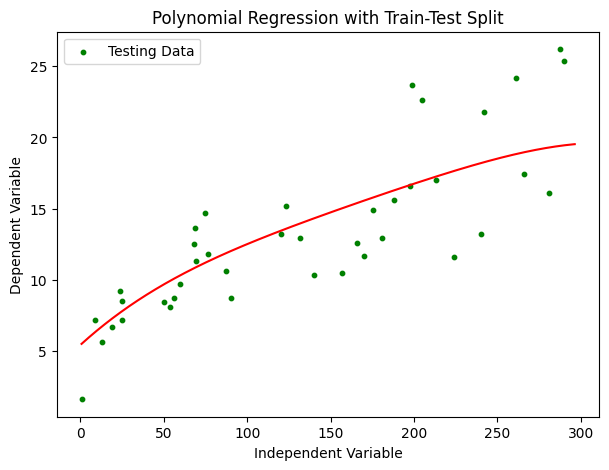

In [55]:
#Plot the results
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, s=10, label='Testing Data', color='green')
plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)),color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Polynomial Regression with Train-Test Split')
plt.legend()
plt.show()

- Now, call the function to get the scatter plot with a blue line showing how the line fits the given data points.

__Observation:__

- As you can see, the regression line is able to fit majority of the data points.
- You can infer from the above implementation that non-linear inputs require non-linear models, such as the polynomial model.

## __3.7 Model Evaluation and Validation__

### **3.7.1 Performance Metrics**

- Evaluation metrics help in regression analysis as they provide quantitative measures of model performance, aiding in the assessment and selection of regression models.


In regression analysis, several evaluation metrics are commonly used to assess the performance of a regression model. Some of the key evaluation metrics include:

#### **1. Mean Squared Error (MSE):**



It calculates the average of the squares of the errors, which are the differences between the actual and predicted values. A lower MSE indicates better model performance.



#### **2. Root Mean Squared Error (RMSE):**


RMSE is the square root of the MSE, providing a measure of the average magnitude of the errors in the predicted values. Since the square root reverses the squaring operation of MSE, RMSE ends up having the same units as the original dependent variable, making it easier to interpret than MSE



#### **3.  Mean Absolute Error (MAE):**


MAE calculates the average of the absolute errors between the actual and predicted values. It's less sensitive to outliers compared to MSE and RMSE.


#### **4.  R-squared (R2):**


R-squared explains how much of the variation in the dependent variable(y) can be attributed to the changes in the independent variable(x). R-squared values range from 0 to 1.

* **0**: This indicates that the model explains none of the variance in the dependent variable. The independent variables have no explanatory power for the changes in y.

* **1**: This represents a perfect fit. The model explains all of the variance in the dependent variable. The changes in y are perfectly captured by the changes in X.

While a higher R-squared generally suggests a better model fit, it's not the only factor to consider. A very high R-squared might be achieved by a model that's simply overfitting the data

In [56]:
# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute mean squared error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

# Compute mean absolute error
mae_train = mean_absolute_error(y_train,y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)

# Compute R Squared
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)
print(' ')
print("Training Set Mean Squared Error:", mae_train)
print("Test Set Mean Squared Error:", mae_test)
print(' ')
print("Training Set R² Score:", r2_train)
print("Test Set R² Score:", r2_test)
print("------------------------------------------")

Training Set Mean Squared Error: 10.251041183933028
Test Set Mean Squared Error: 10.392591556637507
 
Training Set Mean Squared Error: 2.5721744940446136
Test Set Mean Squared Error: 2.5247475157488974
 
Training Set R² Score: 0.6026681059369929
Test Set R² Score: 0.6697561088401027
------------------------------------------


## Find the optimum order for the polynomial fit

__Remark: there is no universal solution to that. We can only offer guidelines and a few tools that may help.__

In [57]:
test_error = []
train_error = []
order_max = 12

for i in range(order_max):

    # Fit a polynomial of degree i+1
    # Declare polynoimial features, order i+1
    poly_features = PolynomialFeatures(degree=i+1)

    # Compute the polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Declare linear regression
    poly_model = LinearRegression()

    # Fit
    poly_model.fit(X_train_poly,y_train)

    # Predict on the training set and testing set
    y_train_pred = poly_model.predict(X_train_poly)
    y_test_pred = poly_model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)

    train_error.append(mse_train)
    test_error.append(mse_test)

In [58]:
train_error

[np.float64(10.617238416139855),
 np.float64(10.274328680728399),
 np.float64(10.260688269013496),
 np.float64(10.251041183933028),
 np.float64(10.123205420517419),
 np.float64(10.082110517550621),
 np.float64(10.224918217050746),
 np.float64(10.451711235619623),
 np.float64(10.607124164751793),
 np.float64(10.972139164855765),
 np.float64(11.230757542166732),
 np.float64(11.556896697812924)]

In [59]:
test_error

[np.float64(10.186181934530214),
 np.float64(10.68550792629335),
 np.float64(10.474549425777202),
 np.float64(10.392591556637507),
 np.float64(10.102408869076699),
 np.float64(10.300664553126166),
 np.float64(10.445089782096577),
 np.float64(10.671721878283073),
 np.float64(11.31989955994469),
 np.float64(13.340572173416513),
 np.float64(13.836188211601257),
 np.float64(14.056123792437768)]

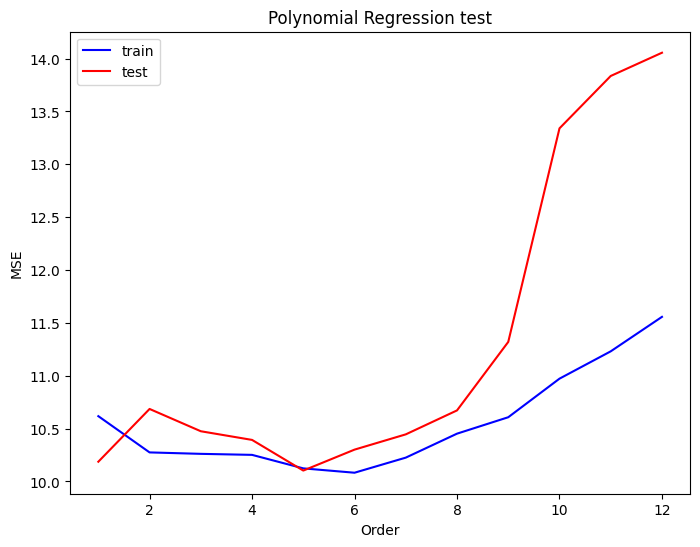

In [60]:
#Plot the results
plt.figure(figsize=(8,6))
plt.plot(range(1,order_max+1), train_error,color='blue',label='train')
plt.plot(range(1,order_max+1), test_error,color='red',label='test')
plt.xlabel('Order')
plt.ylabel('MSE')
plt.title('Polynomial Regression test')
plt.legend()
plt.show()

__Conclusion: the optimal order is 5 (smallest error without overfitting).__

Now that we have selected the model that we want (degree 5), we fit the model

In [61]:
poly_features = PolynomialFeatures(degree=5)

# Compute the polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Declare linear regression
poly_model = LinearRegression()

# Fit
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [62]:
poly_model.coef_

array([ 0.00000000e+00,  2.45074872e-01, -3.67619039e-03,  2.97632283e-05,
       -1.07348010e-07,  1.40122124e-10])

In [63]:
poly_model.intercept_

np.float64(3.9530601580300697)

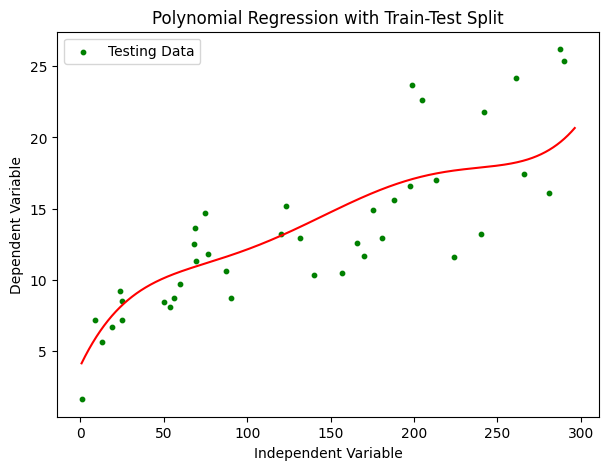

In [64]:
X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
X_range = X_range.reshape((len(X_range), 1))

#Plot the results
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, s=10, label='Testing Data', color='green')
plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)),color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Polynomial Regression with Train-Test Split')
plt.legend()
plt.show()

### __3.7.2 Cross Validation Techniques__

Cross-validation is a machine learning technique that evaluates model performance on unseen data by dividing the data into multiple folds. In each iteration, one fold is used as a validation set and the remaining as training data. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. Some of the common cross-validation techniques are:





**1. K-Fold Cross-Validation**

In K-Fold Cross validation, the dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.
* Pros: Provides a more accurate estimate of model performance.
* Cons: Computationally intensive for large datasets.



**2. Stratified K-Fold Cross-Validation**

Similar to K-Fold but ensures that each fold has the same proportion of different classes as the original dataset. This is especially useful for imbalanced datasets.
* Pros: More reliable performance estimates for imbalanced datasets.
* Cons: Still computationally intensive.



**3. Holdout Method**

In holdout method, the dataset is divided into two sets, a training set and a test set. The model is trained on the training set and evaluated on the test set.

* Pros: Simple and fast.
* Cons: The evaluation may be noisy due to the variability in the training/test split.


**4. Leave-One-Out Cross-Validation (LOOCV)**

A special case of k-fold cross-validation where k is equal to the number of data points in the dataset. Each observation is used once as a test set, and the model is trained on all remaining data points.
* Pros: Maximizes the amount of training data used.
* Cons: Extremely computationally expensive, especially for large datasets.

**Now, let's build a linear regression model, perform analysis on it, and evaluate the model's performance:**

#### Step 1: Set up and Data Loading
- Import the necessary libraries: numpy, pandas, matplotlib.pyplot from sklearn.datasets.
- Load the housing dataset.

In [82]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


#### Step 2: Initial Data Exploration
- Explore the first few rows, generate statistical summaries, and check for missing values using __.head()__, __.describe()__, and __.isna().sum()__.

In [83]:
# Load the dataset
housing_data = pd.read_csv('../data/housing.csv')

In [68]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [84]:
# Display summary statistics for the DataFrame 'housing_df'
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


__Observations:__
- The house price lies mostly in the price bracket between 1.1 million and 2.6 million.
-  Most houses are 18 to 37 years old.


In [85]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [71]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

* Here `total_bedrooms` has null values which we have to remove

- It can be seen that `total_bedroom` is the only feature with **207** null values.
- Since the null values makes up for only 1% of the total data, rows of the column/feature with missing values  will be removed

- ocean_proximity is a categorial variable for which we need to craete dummy variables

In [86]:
# Remove all the rows with null values:
housing_data = housing_data.dropna()

In [87]:
# Recheck for missing values in the DataFrame 'housing_df'
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Let's create dummy variables for ocean_proximity

- `housing_data`: This is the DataFrame containing your housing data.

- `pd.get_dummies`: This is the pandas function that performs the one-hot encoding. It converts categorical variables into a series of binary variables (0 or 1). Each category in the original variable is represented by a separate column.


- `drop_first=True`: This parameter drops the first category for each variable. This is done to avoid the dummy variable trap, which is a situation where the dummy variables are highly collinear, causing issues in statistical models. By dropping the first category, you can reduce multicollinearity.

- `dtype='int'`: This ensures that the resulting dummy variables are of integer type (0 or 1), which can save memory compared to the default float type.

- `prefix='op'`: This parameter adds a prefix to the new dummy variable columns. Here, the prefix 'op' will be added to the beginning of each new column name created by the one-hot encoding process.

In [ ]:
# Not needed
# housing_data = pd.get_dummies(housing_data, drop_first=True, dtype='int',prefix='op')

#### Step 3: Prepare the dataset

**Steps to be followed:**

- Prepare your features (X) and target (y) for modeling.
   * The target feature, which is the feature we are trying to predict, is `median_house_value`. This is assigned to the variable y.
   * The features used to predict the target are the independent variables(X).
  



In [88]:
#Assign values to X and y
X = housing_data.drop(['median_house_value'], axis=1)
y = housing_data['median_house_value']

# Splitting the data into training and testing sets to avoid data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Step 4: Perform K Fold validation

**Key components**

- KFold: Implements K-fold cross-validation.
- n_splits=10: Divides the dataset into 10 folds.
- random_state=42: Ensures reproducible shuffling.
- shuffle=True: Shuffles the data before splitting.

In [89]:
# Use a fold of 10
kf = KFold(n_splits=10, random_state=42, shuffle=True)

#### Step 5: Initialize the model




In [90]:
model = LinearRegression()

**Evaluate the model**

- cross_val_score: Evaluates the model using cross-validation.
- model: The machine learning model to evaluate.
- X_train and y_train: Training features and target variables.
- scoring='neg_mean_absolute_error': Uses negative MAE as the performance metric.
- cv=kf: Cross-validation strategy (e.g., KFold).
- n_jobs=-1: Utilizes all available processors for parallel computation.

In [98]:
k_fold_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=4)

__Remark: we jus trained ten models, theresult is array of 10 scores, 1 for eachmodel__

In [99]:
k_fold_scores

array([-50857.49247028, -51913.77869892, -49138.70588815, -49615.44306958,
       -51686.4165511 , -50241.3339194 , -50539.47610783, -52915.01689686,
       -50842.36482728, -50730.36336761])

**Evaluating Cross-Validation Scores:**


Calculate metrics (e.g., Mean Absolute Error, Mean Squared Error) from cross-validation scores to evaluate the model's performance.

- np.abs(scores): Converts negative MAE values to positive MAE values.
- np.mean(scores): Calculates the average MAE across all 10 cross-validation folds.

__Finally: We compute mean of 10 scores__

In [93]:
from statistics import mean
np.mean(np.abs(k_fold_scores))

np.float64(50848.03917970085)

#### Step 6: Train the Model and Evaluate on Test Set

**Now fit the model with train data and calculate MSE for test data.**
- Train the model using the training data `X_train` and `y_train`.
- Uses the trained model to make predictions on the test data `X_test`.
- Calculates the Mean Squared Error (MSE) between the actual test target values `y_test` and the predicted values `y_test_pred`.
- Print the calculated Test MSE.

In [94]:
# Evaluate the model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

# Calculate R-squared score
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r2}")

# add the train score as well.
# compute RMSE instead of MSE

Test MSE: 4738972791.400507
Test R-squared: 0.6445130291082324


**Observation**
- An MSE of `4614164009.958683` is quite large, indicating that on average, the squared prediction errors are large. This can be interpreted in the context of the units of the dependent variable (`median_house_value`), which are likely in dollars.

- This can further be mitigated by Scaling the features. Feature scaling is critical in machine learning to ensure that all features contribute equally to the model’s prediction. We'll discuss about it in detail, further in the lesson

- An R2 score of `0.65` means that approximately `64%` of the variance in `median_house_value` is explained by the model. This suggests that while the model captures a significant portion of the variability, there is still `35%` of the variance unexplained by the model


**Repeat the process to demonstrate LOOCV:**

* X_train, y_train  is same across all CV implementation






In [103]:
# Perform LOOCV
loo = LeaveOneOut()

# Compute Cross-validation scores
loocv_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1)

np.mean(np.abs(loocv_scores))

# add the same for train test eval score

np.float64(50833.2611299985)

**Note: Stratified K-Fold is typically used for classification problems. For regression, standard K-Fold is preferred.**

**Observation**

Mean Absolute Error is quite high. To improve the model, more complex model can be considered which will be discussed in further lessons.

## __3.8 Regularization__

**Regularization in Regression**

In linear regression, regularization encompasses a set of techniques employed to address the issue of overfitting.

**Core Concept**

Regularization techniques achieve their objective by introducing a penalty term to the model's objective function. This objective function, typically measured by mean squared error, is minimized during the training process. The penalty term discourages the model from attaining excessive complexity by penalizing the size of the model coefficients, thereby mitigating overfitting.

**Regularization term** or `alpha`: is a hyperparameter that scales the penalty term. It controls the strength of regularization.
- Higher `alpha`: Imposes a stronger penalty on the coefficients, leading to greater regularization. This tends to produce a simpler model that may underfit the training data but often generalizes better to unseen data.
- Lower `alpha`: Imposes a weaker penalty, leading to a model that is less restricted by the regularization and more complex, potentially capturing more details in the data but at the risk of overfitting.

**Benefits of Regularization**

Enhanced Generalizability: By mitigating overfitting, regularization fosters models that perform well on unseen data.

Reduced Model Complexity: It promotes interpretability and potentially reduces computational costs associated with training complex models.


Common Regularization Techniques are:

* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization)


### __3.8.1 Least Absolute Shrinkage and Selection Operator (Lasso) Regression__

**Least Absolute Shrinkage and Selection Operator (Lasso) Regression** relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. As a consequence, we can fit a model containing all possible predictors and use lasso to perform variable selection by using a technique that regularizes the coefficient estimates (it shrinks the coefficient estimates towards zero).

- It performs variable selection or feature selection.
- It forces some of the coeﬃcient estimates to be exactly equal to zero with the help of a large tuning parameter λ.
- It helps reduce the learning of more complex data and overfitting of the model.
- It decreases the variance of the model without an increase in bias.
  
In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.

**Residual Sum of Squares (RSS)**, which is the sum of square of difference between actual and predicted values.

$$ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:

$y_i$: represents the actual target value from the dataset

​$\hat{y}_i$: represents the predicted target values by the regression model.

𝑛: is the number of observations.


The predictions ​$\hat{y}_i$ in a regression model are typically calculated using the linear regression equation. For multiple regression involving several predictor variable, the equation is:


 $ \hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $ predictor.


- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.

The RSS formula for multiple linear regression can also be written as:

$$ \text{RSS} = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2 $$

Where:

- $ y_i $ represents the actual value for the \(i\)-th observation.
- $ \beta_0 \ $ is the intercept.
- $ \beta_j \ $ are the coefficients for each predictor \(j\).
- $ x_{ij} $ represents the \(j\)-th predictor variable for the \(i\)-th observation.
- $ n $ is the total number of observations.
- $ p $ is the number of predictor variables.

In Lasso regression, the minimization objective becomes:

$$ \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2 + \alpha \sum_{j=1}^p |\beta_j| $$

which equals:

$$ \text{RSS} + \alpha \sum_{j=1}^p |\beta_j| $$

Where $ \alpha \ $ (alpha) can take various values:
- $ \alpha = 0 \ $: Same coefficients as least squares linear regression
- $ \alpha = \infty $: All coefficients are zero
- $ 0 < \alpha < \infty $: Coefficients are between 0 and that of least squares linear regression


### Now, Let us implement lasso regression.

Import the required libraries.


In [104]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

- You will now read the **Hitters.csv** dataset.
- Let us now check the head of the data.

**Description of the Dataset**

A data frame with 322 observations of major league players on the following 20 variables (see more about the dataset in this [documentation](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf))




**We want to predict a baseball player's salary based on various statistics associated with performance in the previous year.**


In [155]:
# Load the data from a CSV file into a DataFrame and display 5 rows
df = pd.read_csv('../data/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


**Observation**

- The above output shows the head of the data.

In [156]:
df.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [157]:
# Remove "Unnamed: 0" from the dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**Observations**
- Overall, it includes 322 observations and 21 columns.
- As seen, the **Salary** field has null values.

In [159]:
print("Number of missing values in 'Salary':", len(df[df['Salary'].isnull()]))
# Remove rows with missing values
df.dropna(subset=['Salary'], inplace=True)
df.info()


Number of missing values in 'Salary': 59
<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263

There are 59 rows out 322 observations with null values corresponding to column `Salary`

Since we will use the lasso algorithm from scikit learn, we need to encode our categorical features as one-hot numeric features (dummy variables):

**Note: Lasso regression assumes that the features are numeric and continuous, and does not work well with categorical variables.**

In [160]:
# creating dummies for all the variable of object type
dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])
# Convert boolean True/False to integer 1/0
dummies = dummies.astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    int64
 1   League_N     263 non-null    int64
 2   Division_E   263 non-null    int64
 3   Division_W   263 non-null    int64
 4   NewLeague_A  263 non-null    int64
 5   NewLeague_N  263 non-null    int64
dtypes: int64(6)
memory usage: 14.4 KB


In [161]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [162]:
# create label X and y
y = df['Salary']

# drop the column with the outcome variable (Salary), and categorical columns for which dummy variables is already created:
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

#list of all numerical columns in X_numericals
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

Concatenate the dummy variable dataframe and X_numerical to create X

Creating dummy variables for `League`, `Division`, and `NewLeague` allows us to convert categorical data into a numerical format suitable for machine learning models, while avoiding multicollinearity by dropping one category. This ensures that the models can interpret and leverage these categorical distinctions effectively.

**Data Description**
* **League (A or N):** American League (A) or National League (N) as of the end of 1986.
* **Division (E or W):** Eastern Division (E) or Western Division (W) as of the end of 1986.
* **NewLeague (A or N):** American League (A) or National League (N) as of the beginning of 1987.

`League_N`: 1 if the league is National League (N), 0 otherwise.

`Division_W`: 1 if the division is Western Division (W), 0 otherwise.

`NewLeague_N`: 1 if the new league is National League (N), 0 otherwise.

In [163]:
# Create X with dummy variables and numerical variables
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    int64  
 17  Division_W   263 non-null    int64  
 18  NewLeague_N  263 non-null    int64  
dtypes: float64(16

In [164]:
# Split the dataset into training and testing sets before handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

- This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation

- To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data.

**Data leakage** occurs when information from outside the training dataset is used to create the model. This can happen if data that would not be available at the time of prediction is included in the training process. Data leakage can lead to optimistic performance estimates and models that fail to generalize well to new, unseen data.



**Standard Scaler:**

We use standardization to ensure that numerical features have a mean of 0 and a standard deviation of 1, which improves model performance, accelerates convergence, and ensures consistent feature impact in machine learning algorithms.

- **`StandardScaler()`**: Creates an instance of the StandardScaler.

- **`.fit(X_train[list_numerical])`**: Computes the mean and standard deviation for each feature in the `X_train[list_numerical]` dataset. `X_train` is your training dataset, and list_numerical is a list of column names corresponding to the numerical features. This step calculates the parameters needed for scaling but does not yet apply the scaling.

- **`scaler.transform(X_train[list_numerical])`**: Applies the standardization to the training data. This transforms each feature in the training dataset to have a mean of 0 and a standard deviation of 1.

- **`X_train[list_numerical]`**: The transformed numerical features are assigned back to the `X_train` DataFrame, effectively replacing the original values.

- **`scaler.transform(X_test[list_numerical])`**: Applies the same standardization parameters (mean and standard deviation) computed from the training data to the test data. This ensures that the test data is scaled in the same way as the training data.

- **`X_test[list_numerical]`**: The transformed numerical features are assigned back to the `X_test` DataFrame, replacing the original values.

In [165]:
# Perform Standardization on numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

Here we are fitting a StandardScaler to the numerical features in `X_train` to compute their mean and standard deviation, then using this scaler to standardize the same numerical columns in both `X_train` and `X_test`, ensuring they have a mean of 0 and a standard deviation of 1. After standardizing, we replace the original values in `X_train` and `X_test` with the new standardized data.

In [166]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,-0.522628,-0.366092,0.024062,-0.122668,-0.343697,-0.409632,-1.104715,-0.991146,-0.945558,-0.692815,-0.916302,-0.879180,-0.852284,-0.520074,-0.398678,-0.072544,1,0,1
229,0.782855,0.863756,-1.330312,0.524986,0.091599,1.790776,0.375753,0.910091,0.682733,-0.681018,0.664994,0.128285,1.046082,-0.247847,2.419075,1.038997,1,0,1
286,1.337335,1.049393,1.265572,0.605943,0.922619,0.547067,-0.258733,0.056545,-0.048862,0.734551,0.028909,0.158814,0.252220,0.030862,-0.749109,-0.390128,0,1,0
102,-1.189407,-1.340689,-1.104583,-0.527452,-1.135144,-1.127157,0.164258,-0.555293,-0.579003,-0.751797,-0.574481,-0.641052,-0.572323,-0.659429,0.123393,0.245039,0,0,0
153,-0.431384,-0.273273,-0.653125,-0.244103,-0.383269,-1.031487,0.587249,0.142591,0.135930,0.121138,0.058632,0.293143,-0.131288,-0.477944,-0.792019,-0.548919,1,1,1


- Filling in the missing value by taking the median of elements in `y_train`.
-  `y` is a series with values from the target variable `Salary`, and not a dataframe, hence directly computing the median.
  

According to standard machine learning practices, filling missing values in the test set with statistics (like median) calculated from the training set does not constitute Data leakage. This method ensures that no information from the test set influences the training process, thus maintaining the integrity of the evaluation.

In [167]:
# Imputing the values NA values in the series with the median
median_salary = y_train.median(skipna=True)
# NEVER FILL A TARGET VARIABLE
# y_train = y_train.fillna(median_salary)
# y_test = y_test.fillna(median_salary)


### Create a Lasso Model.

First, we apply lasso regression on the training set with regularization parameter `alpha`=1

`alpha = 1`: This value is commonly used as default and provides a good balance between maintaining model complexity and reducing overfitting.


In [118]:
# Create and fit the Lasso regression model to the training data
# max_iter for gradient descent
lasso_model = Lasso(alpha=1, max_iter=1000_000, tol=1e-6).fit(X_train, y_train)

In [119]:
# Get the coefficients (weights) of the fitted Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

# Get the intercept of the fitted Lasso regression model
print("Lasso intercept:", lasso_model.intercept_)

Lasso coefficients: [-238.17568646  323.65394964   28.31902461  -29.61833358  -12.52044099
   93.08871476    4.30359172 -132.69931583    0.           32.20100742
  349.99917387   65.74313401 -115.68715379   80.18534618   26.50622619
   -5.71311785   77.21205127  -99.00050693  -17.05225795]
Lasso intercept: 564.5773604524226


__Remark: Specific to Lasso one of the parameter if zero. It does not happen in other regularization algo__

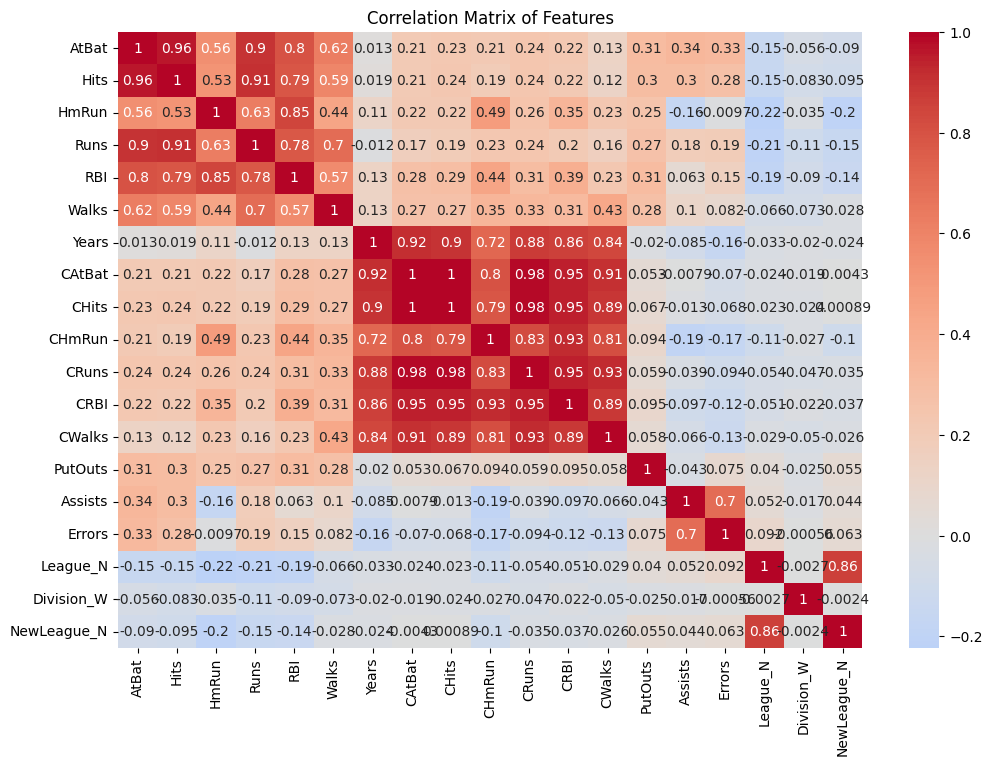

In [120]:
# Plot X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

**Observation**

* Lasso Intercept: 552

This is the intercept term of your Lasso regression model. It represents the expected mean value of the dependent variable when all independent variables are set to zero. In practical terms, it's the baseline prediction when no other information (from the variables) is provided.
Lasso Coefficients:

* Lasso coefficients: represent the relationship between each independent variable and the dependent variable.
Each coefficient estimates the change in the dependent variable for a one unit change in the respective independent variable, holding all other variables constant.
    - A positive coefficient indicates that as the independent variable increases, the dependent variable also increases.
    - A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
    - The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect.




* Lasso regression is known for its ability to perform feature selection by shrinking some coefficients to zero, thus effectively removing those variables from the equation.

* In this model, however, it seems that none of the coefficients are exactly zero, suggesting that all included variables have some impact on the model, though some impacts are very small (e.g., coefficients close to zero).

- Test the lasso model and make predictions
- Evaluate the RMSE and R2 scores for model performance.
- Optimize the model.


**Model Evaluation on Lasso model**

In [121]:
# Training data
pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = lasso_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 84625.92
R squared training set 57.24
---------------------------
MSE test set 128935.86
R squared test set 40.44


To better understand the role of `alpha`(regularization parameter), plot the lasso coefficients as a function of `alpha` (max_iter are the maximum number of iterations):

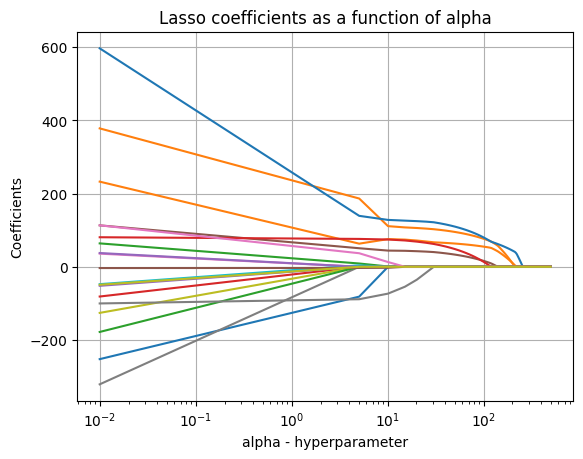

In [132]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=100_000, tol=1e-6)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.grid(True)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha - hyperparameter')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');
plt.show()

Moving from left to right in the plot, observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing `alpha`, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for  `alpha`. Lasso regression comes with built-in cross-validation.

In [168]:
alphas = np.linspace(0.01, 500, 100)
# Or
# np.random.randint(0, 1000, 100)

In [169]:
# Create and fit the LassoCV model to the training data with cross-validation
# Lasso with 10 fold cross-validation
# For possible values of alpha we use 100 random values between 0 and 1000
lasso_cv_model = LassoCV(alphas = alphas, cv =10, max_iter=10_000, n_jobs=-1).fit(X_train, y_train)

Let's check the best alpha value.

In [170]:
# Get the best alpha (regularization strength) selected by cross-validation
lasso_cv_model.alpha_

np.float64(5.06040404040404)

Let's use the best alpha value, and see if you can tune it.

In [171]:
# Create and fit the Lasso regression model using the best alpha found by cross-validation
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Model Evaluation on Lasso model with the best alpha**

In [172]:
# Training data
pred_train_tuned = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set post tuning', round(mse_train, 2))
print('R squared training set post tuning', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = lasso_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set post tuning', round(mse_test, 2))
print('R squared test set post tuning', round(r2_score(y_test, pred_test_tuned)*100,2))

MSE training set post tuning 89015.92
R squared training set post tuning 55.02
---------------------------
MSE test set post tuning 142531.31
R squared test set post tuning 34.16


Now, let's find the coefficient of the tuned model.

In [173]:
# Create a Pandas Series of the coefficients from the tuned Lasso regression model
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat          -81.676034
Hits           186.578386
HmRun            8.980803
Runs             0.000000
RBI              0.000000
Walks           50.615955
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           4.202887
CRuns          139.392515
CRBI            62.644482
CWalks          -0.000000
PutOuts         76.105184
Assists          0.000000
Errors          -3.147114
League_N        37.032885
Division_W     -88.566418
NewLeague_N      0.000000
dtype: float64

**Observations**
- Zero Coefficients: Features like Runs, RBI, CAtBat, CHmRun, NewLeague_N, and several others have coefficients shrunk to zero. This indicates that Lasso has deemed these features less important or irrelevant for predicting the target variable in the presence of other features.

- Non-Zero Coefficients: Features such as AtBat, Hits, Walks, CRuns, and CRBI have non-zero coefficients and are considered significant predictors in the model. The magnitude and sign of each coefficient indicate the strength and direction of the influence on the response variable:

Positive Coefficients (e.g., Hits at 224.372390 and CRuns at 200.690747) suggest that an increase in these variables is associated with an increase in the target variable.

Negative Coefficients (e.g., AtBat at -239.109204 and Years at -68.010940) suggest that an increase in these variables is associated with a decrease in the target variable

### __3.8.2 Ridge Regression__

**Ridge Regression** also known as L2 Regularization is a regularization technique used in linear regression to prevent overfitting. It is useful for handling multicollinear data, where two predictors/independent variables are highly correlated to each other.

*Collinearity* refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning they have a linear relationship. This correlation makes it difficult to determine the individual effect of each predictor on the target variable, leading to unreliable and unstable estimates of regression coefficients.

Ridge regression adds a regularization term to the loss function that penalizes large coefficients in the model and encourages the model to have smaller coefficients.
It results in a simpler and more generalized model.

Ridge Regression does shrink the coefficients, it does not force them to zero, meaning it does not perform feature selection



Let's see how to implement Ridge regression


- First, import the required libraries.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

- Starting the implementation using the train test data acquired from the Lasso implementation on **Hitters.csv** dataset


- Let's fit the model and check what the intercept value is.

In [ ]:
# Create and fit the Ridge regression model to the training data

# Create
ridge_model = # CODE HERE

# Fit
# CODE HERE

In [ ]:
# Show corfficients and intercept

ridge_model.intercept_
ridge_model.coef_

__Observation:__
- The intercept value for the Ridge model is 552.

**Model evaluation on Ridge model**


In [ ]:
# Training data
pred_train = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = ridge_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

Let's check the coefficient of the model.

In [ ]:
# Get the coefficients (weights) of the fitted Ridge regression model
ridge_model.coef_

Next, we use cross-validation to find the best value for  `alpha`. Ridge regression just like lasso, comes with built-in cross-validation.

In [ ]:
ridge_cv_model = RidgeCV(alphas= np.random.randint(0, 1000, 100), cv=10).fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
ridge_cv_model.alpha_

In [ ]:
# Create and fit the ridge regression model using the best alpha found by cross-validation
ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Model evaluation on tuned Ridge model**

In [ ]:
# Training data
pred_train_tuned = ridge_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = ridge_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test_tuned)*100,2))

In [ ]:
# Create a Pandas Series of the coefficients from the tuned Ridge regression model
pd.Series(ridge_tuned.coef_, index=X_train.columns)

**Observation**

- The coefficients with the highest values suggest that cumulative career statistics like total runs batted in, total hits, and total runs scored historically have the most significant positive influence on the target variable.

- Division_W: The only feature with a notably high negative coefficient is Division_W, which indicates that being in the Western division is associated with a negative effect on the target variable. This could reflect divisional performance differences or disparities in competitive levels.

- Years, Assists, and NewLeague_N: These features have smaller positive coefficients, suggesting a modest but positive influence on the model’s predictions. This indicates that experience and being in a new league might have a slight positive impact.

This analysis helps in understanding the relative importance and influence of different aspects of a baseball player's statistics on the predicted target

### __3.8.3 Elastic Net Regression__

Elastic Net regression is a regularization technique that linearly combines the penalties of Lasso (L1) and Ridge (L2) methods. It is particularly useful when dealing with highly collinear data, where ordinary least squares might not perform well.

*Ordinary Least Squares (OLS)* is a method for estimating the parameters in a linear regression model. OLS aims to find the line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model. While OLS works well under many circumstances, it can become problematic when predictor variables are highly collinear making the model unstable and less interpretable.

The Elastic Net method is defined as minimizing the following loss function:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$



Where:
- $\frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2$ is the residual sum of squares.
- $\lambda_1 \sum_{j=1}^{p} |\beta_j|$ is the L1 penalty (Lasso).
- $\lambda_2 \sum_{j=1}^{p} \beta_j^2$ is the L2 penalty (Ridge).

- $\lambda_1$ and $\lambda_2$ are regularization parameters that control the balance between fitting the model well to the data and keeping the model parameters small to avoid overfitting.


Let's see how to implement Elastic net regression


- First, import the required libraries.

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

- Starting the implementation using the train test data acquired from the Lasso implementation on **Hitters.csv** dataset


- Let's fit the model and check what the intercept value is.

In [ ]:
# Initializing and fitting the ElasticNet model
# Create
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization parameter

# Fit
elastic_net.fit(X_train, y_train)
elastic_net.intercept_

__Observation:__
- The intercept value for the ElasticNet model is 518.

- The following code calculates the root mean squared error (RMSE) of the testing data:

In [ ]:
# Make predictions on the test set using the fitted Ridge regression model
y_pred = elastic_net.predict(X_test)
mean_squared_error(y_test, y_pred)

print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

__Observation:__
- The MSE value is 115482.
- Root mean Squared Error(RMSE):  339.827814119469

Let's check the coefficient of the model and the R2 score.

In [ ]:
# Get the coefficients (weights) of the fitted Ridge regression model
elastic_net.coef_

In [ ]:
# Get r2_score
r2_score(y_test, y_pred)

__Observation:__
- The r2 score is 0.38.

In Elastic Net regression,
- `alpha` controls the overall strength of regularization, with higher values leading to more shrinkage of the coefficients to reduce overfitting.  It's better to use a log scale or more systematic approach to ensure that the alphas tested cover a suitable range, especially since very small or very large values might not be appropriate:

- `l1_ratio` determines the mix of L1 (Lasso) and L2 (Ridge) regularization, ranging from 0 (pure Ridge) to 1 (pure Lasso). Intermediate values blend the two, leveraging Lasso's sparsity and Ridge's ability to handle multicollinearity. Ensure l1_ratio ranges from a small positive number to 1 (but not including 0 if you wish to avoid pure Ridge regression). This parameter is the mix ratio that controls the combination of L1 and L2 regularization

Tuning these parameters allows Elastic Net to balance model performance and interpretability effectively.



In [ ]:
# Define the parameter grid for alpha and l1_ratio
alphas = np.logspace(-2, 2, 100)

# start from 0.01 to include L1 regularization
l1_ratios = np.linspace(0.01, 1, 100)

# Create and fit the Elastic Net CV model, using 10-fold cross-validation
elastic_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=10000).fit(X_train, y_train)

In [ ]:
best_alpha = elastic_cv_model.alpha_
best_l1_ratio = elastic_cv_model.l1_ratio_
# Print the best alpha and l1_ratio found
print('Best alpha:', best_alpha)
print('Best l1_ratio:', best_l1_ratio)

In [ ]:
# Create and fit the Elastic Net regression model using the best alpha and l1_ratio found by cross-validation
elastic_tuned = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000).fit(X_train, y_train)

# Make predictions on the test set using the tuned Elastic Net regression model
y_pred_tuned = elastic_tuned.predict(X_test)

In [ ]:
# Calculate and print the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print('Root Mean Squared Error:', rmse)

In [ ]:
# Create a Pandas Series of the coefficients from the tuned Elastic Net regression model
coefficients = pd.Series(elastic_tuned.coef_, index=X_train.columns)
print(coefficients)

In [ ]:
# Print R-squared scores for the training and test sets
print('R squared training set:', round(elastic_tuned.score(X_train, y_train) * 100, 2))
print('R squared test set:', round(elastic_tuned.score(X_test, y_test) * 100, 2))


## __3.9 Model Optimization__

### __3.9.1 Hyperparameter tuning__

- Hyperparameter tuning is the process of finding the best settings for the parameters in a machine-learning model.
- Hyperparameters are settings that are not learned during training but are set before the training process begins.
- Hyperparameter tuning involves trying different combinations of hyperparameters and evaluating the model's performance using validation techniques.

Some common techniques for Hyperparameter tuning are:

1. **Grid Search**: It systematically works through multiple combinations of hyperparameters. It performs an exhaustive search on a specified parameter grid.


  * **How it works:**
    * Define a Parameter Grid: Specify a set of hyperparameters and their possible values.
    * Combination Evaluation: The algorithm evaluates all possible combinations of these hyperparameters.
    * Model Training: For each combination, the model is trained and evaluated using cross-validation.
    * Optimal Parameters: The combination yielding the best performance (e.g., highest accuracy) is chosen as the optimal set.

2. **Random Search:** It explores hyperparameter space by sampling a fixed number of parameter settings from the specified distributions.

* **How it works:**
  * Define Parameter Distributions: Specify distributions or ranges for the hyperparameters.
  * Random Sampling: Randomly sample combinations of hyperparameters from these distributions.
  * Model Training: For each sampled combination, the model is trained and evaluated using cross-validation.
  * Optimal Parameters: The combination yielding the best performance is chosen as the optimal set.

### Implementation of Gridsearch Cross validation technique:

In [ ]:
# Import the necessary classes from scikit-learn
from sklearn.model_selection import GridSearchCV

# Create a repeated K-fold cross-validator
cv = RepeatedKFold(n_splits =10, n_repeats =3, random_state =1)

In [ ]:
# Define the grid of hyperparameters to search
grid = dict()
grid['alpha'] = np.arange(0,1,0.1)

In [ ]:
# Create an instance of the Ridge regression model
model = Ridge()

# Create the GridSearchCV object
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error',cv = cv, n_jobs= -1)

In [ ]:
# Fit the GridSearchCV object to the training data
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

__Observation:__

- As you can see from the output, the Mean Absolute Error, and the configuration fusion alpha is **0.9**.

- Let's try this with alpha points and predict it.

In [ ]:
# Fetch the value from the key value pair in the dictionary, results
results.best_params_.get('alpha')

In [ ]:
# Create and fit the Ridge regression model to the training data with the optimal alpha
ridge_model_after_gridcv = Ridge(alpha = results.best_params_.get('alpha')).fit(X_train, y_train)
y_pred_after_gridcv = ridge_model_after_gridcv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_after_gridcv))

In [ ]:
# Get the r2 score
r2_score(y_test,y_pred_after_gridcv)

__Observation:__
- The r2 score is 0.38. It suggests a moderate fit. The model captures some of the variability in the data but not a large portion.

- Let's check the coefficient of the ridge regression.

In [ ]:
# Create a Pandas Series of the coefficients from the fitted Ridge regression model
pd.Series(ridge_model_after_gridcv.coef_, index = X_train.columns)

__Observation:__

- Penalization has occurred, as you can see in the negative values.

### __Sklearn Pipelines__

#### __Why sklearn pipelines?__

**Pipelines provide an organized approach to managing your data preprocessing and modeling code. They combine preprocessing and modeling steps into a single, streamlined process.**

 - **Cleaner Code**: Pipelines eliminate the need to manually manage training and validation data at each preprocessing step, reducing clutter and complexity.

 - **Fewer Bugs**: By bundling steps together, pipelines minimize the risk of misapplying or forgetting a preprocessing step.

 - **Easier to Productionize**: Pipelines simplify the transition from a prototype model to a scalable, deployable solution.

**Syntax**:
```python
class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)

```

**Before we start the application, let's pay attention to the following important points**:

 - A pipeline is a sequence of data transformers that can include a final predictor.

 - It lets you apply multiple preprocessing steps to your data in order, and optionally end with a predictor for modeling.

 - Each intermediate step in the pipeline must have fit and transform methods, while the final step only needs fit.

 - You can cache these transformers using the memory argument.

 - The pipeline's main goal is to combine multiple steps that can be cross-validated together and have their parameters adjusted.

 - You can set parameters for any step by using its name followed by a double underscore(__) and the parameter name.

 - You can replace any step's estimator with another estimator or remove a transformer by setting it to 'passthrough' or None.

#### Lets look at the housing data with `Ocean proximity` feature:

In [ ]:
housing_data = pd.read_csv("housing_with_ocean_proximity.csv")

In [ ]:
housing_data.head(5)

In [ ]:
# Separate features and target variable
# Assuming 'median_house_value' is the target variable in your dataset
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)

In [ ]:
# Print info to check the structure of the training data
print(X_train.info())
print(X_train.isna().sum())

#### Implementation for sklearn pipelines


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/Sklearn_pipeline_1.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/Sklearn_pipeline_2.png)

#### We need to perform following preprocessing steps before building the model

1. Missing value treatment - 162 missing values in total_bedrooms(a numeric column)
2. Dummy variable creation for categorical data
3. Standardization of numeric variables

In [ ]:
# import StandardScaler for standardization and OneHotEncoder for creating dummy variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# import SimpleImputer for missing value treatment
from sklearn.impute import SimpleImputer

# importing pipeline class. The Pipeline class is used to create a sequence of data processing steps.
from sklearn.pipeline import Pipeline

# importing ColumnTransformer class to apply different preprocessing steps to different subsets of features in your dataset.
from sklearn.compose import ColumnTransformer

**A note about ColumnTransformer**

* ColumnTransformer class allows you to apply different preprocessing steps to different subsets of features in your dataset.
* This is particularly useful when you have a mix of numerical and categorical data that require different types of preprocessing.
* ColumnTransformer ensures that each column or group of columns gets the appropriate transformation before combining the results for further processing or modeling.

### __Data preprocessing starts here:__

#### Steps to perform:
    
#### Step 1: Let's store the names of numeric and object type variables separately.

In [ ]:
# Set up preprocessing steps for numeric and categorical data
housing_cat = X_train.select_dtypes(include='object').columns
housing_num = X_train.select_dtypes(exclude='object').columns

In [ ]:
X_train.isna().sum()

------------------------------------

#### Step 2: Set-up sklearn pipeline for numeric variables. We need to perform missing value imputation and then standardization.

In [ ]:
# Numeric variables pipeline
# SimpleImputer: Univariate imputer for completing missing values with simple strategies.
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

The num_pipeline is a pipeline that preprocesses numerical data in two steps:

- Imputation: Fills missing values using the median value of each column (SimpleImputer(strategy='median')).
 - Standardization: Scales the data to have a mean of 0 and a standard deviation of 1 (StandardScaler()).

This pipeline ensures consistent and streamlined preprocessing of numerical data.

------------------------------------

#### Step 3: Unified Data Preprocessing with Pipelines and ColumnTransformer

In [ ]:
# Unified preprocessing for both numeric and categorical data
preprocessing = ColumnTransformer([
    ('num', num_pipeline, housing_num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), housing_cat)
])

The preprocessing step uses ColumnTransformer to apply different preprocessing pipelines to different types of data in the dataset:

 - Numerical Data: Applies num_pipeline to columns in housing_num, performing imputation and standardization.
 - Categorical Data: Applies OneHotEncoder to columns in housing_cat, converting categorical variables into a one-hot encoded format, ignoring unknown categories.

This ensures that both numerical and categorical data are preprocessed appropriately within a single, unified framework.

------------------------------------

#### Let's check how the pipeline we have created works with the data

In [ ]:
# applying preprocessing pipeline to train data
check_train = # CODE HERE

In [ ]:
# converting array to dataframe to have a better look at it
check_train_df = pd.DataFrame(check_train)
check_train_df.head(3)

In [ ]:
check_train_df.isna().sum()

#### __Observation:__

1. Good to see all the missing values are treated
2. numeric variables are standardised
3. ocean_proximity is converted to dummy variables

------------------------------------

#### Step 4: Building Linear regression model and hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [ ]:
# Create an instance of the Ridge regression model
model = Ridge()

In [ ]:
# Build a Ridge regression model within a complete pipeline

final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model_ridge', model)
])


In [ ]:
# Define the grid of hyperparameters to search

# Note: You can set parameters for any step by using its name followed by a double underscore(__) and the parameter name.

grid = dict()

grid['model_ridge__alpha'] = np.arange(0.1,2.1,0.1)

In [ ]:
search = GridSearchCV(estimator = final_pipeline, param_grid = grid, scoring = 'neg_mean_absolute_error',cv = 5, n_jobs= -1)
# Fit the GridSearchCV object to the training data

# Fit GridSearchCV to the training data
results = search.fit(X_train, y_train)

In [ ]:
print('MAE: %.3f' % -results.best_score_)
print('Config: %s' % results.best_params_)

------------------------------------

#### Step 5: Using pipeline object to test the results

In [ ]:
# Predict on the test set using the trained model
y_pred = search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/sklearn_pipeline_3.png)

### __Conclusion__

Regression analysis is an essential method for examining and predicting variable relationships. In this lesson, we've delved into core types of regression—simple linear, multiple linear, and polynomial regression.

You've acquired skills to assess model performance using metrics like MSE, RMSE, and R-squared. Furthermore, we explored regularization techniques such as Lasso, Ridge, and ElasticNet to mitigate overfitting, and learned the importance of hyperparameter tuning for optimizing model parameters to enhance results.

In conclusion, this lesson has provided a comprehensive exploration of regression through theoretical insights and hands-on applications.